# ML Project - Data jobs

## Index
1. Data pre-processing
   * Libraries
   * Data loading
   * Structure formatting
   * Value formatting
2. Problem to solve
3. Split into train/test
4. Target
5. Understanding variables
   * Dataset information
   * Variable deletion
6. Univariate analysis
   * Categoric variables
   * Numeric variables
7. Bivariate analysis
8. Cleaning data
   * Missings
   * Outliers
9. Econding
10. Feature reduction
11. Model selection
12. Model testing
13. Results

## 1. Data pre-processing

### 1.1. Libraries

In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

warnings.filterwarnings("ignore")

### 1.2. Data loading

In [2]:
df_engineer_jobs = pd.read_csv('dataset/DataEngineer.csv')
df_analyst_jobs = pd.read_csv('dataset/DataAnalyst.csv')
df_scientist_jobs = pd.read_csv('dataset/DataScientist.csv')

### 1.3. Structure formatting

In [3]:
print('Data engineer:',df_engineer_jobs.shape[0],'rows',df_engineer_jobs.shape[1],'columns')
print('Data analyst:',df_analyst_jobs.shape[0],'rows',df_analyst_jobs.shape[1],'columns')
print('Data scientist:',df_scientist_jobs.shape[0],'rows',df_scientist_jobs.shape[1],'columns')

Data engineer: 2528 rows 15 columns
Data analyst: 2253 rows 16 columns
Data scientist: 3909 rows 17 columns


In [4]:
df_engineer_jobs.sample(1)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
629,Data Engineer,$94K-$107K (Glassdoor est.),"DATA ENGINEER – HOUSTON, TX\n\nWho We Are\n\nA...",-1.0,m1neral,"Houston, TX","Houston, TX",Unknown,-1,Company - Private,-1,-1,Unknown / Non-Applicable,-1,-1


In [5]:
df_analyst_jobs.sample(1)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
165,165,Business Analyst - Data Governance,$43K-$76K (Glassdoor est.),"At Rockstar Games, we create the games we woul...",4.1,Rockstar Games\n4.1,"New York, NY","New York, NY",1001 to 5000 employees,1998,Subsidiary or Business Segment,Video Games,Media,$10 to $25 million (USD),-1,-1


In [6]:
df_scientist_jobs.sample(1)

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
3087,3087,3415,SystemC Modeling Engineer,$145K-$176K (Glassdoor est.),"Description\n\nAt Xilinx, we are leading the i...",3.7,Xilinx\n3.7,"San Jose, CA","San Jose, CA",5001 to 10000 employees,1984,Company - Public,Computer Hardware & Software,Information Technology,$2 to $5 billion (USD),"Qualcomm, Intel Corporation, AMD",-1


In [7]:
# Delete columns with errors
df_analyst_jobs.drop(['Unnamed: 0'], axis=1, inplace=True)
df_scientist_jobs.drop(['Unnamed: 0','index'], axis=1, inplace=True)

In [8]:
# Delete excess rows so that all dataframes have 2250 rows
size = df_analyst_jobs.shape[0]
df_engineer_jobs.drop(df_engineer_jobs.index[size-1:-1], inplace=True)
df_scientist_jobs.drop(df_scientist_jobs.index[size-1:-1], inplace=True)

In [9]:
# Modify the Job Title column values of each dataframe
df_engineer_jobs.loc[:,'Job Title'] = 'Data engineer'
df_analyst_jobs.loc[:,'Job Title'] = 'Data analyst'
df_scientist_jobs.loc[:,'Job Title'] = 'Data scientist'

In [10]:
# Merge all dataframes into one
df_jobs = pd.concat([df_engineer_jobs, df_analyst_jobs, df_scientist_jobs])

In [11]:
df_jobs.sample(3)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
142,Data scientist,$129K-$210K (Glassdoor est.),Machine Learning Researcher / Data Scientist\n...,-1.0,"J Harlan Group, LLC","New York, NY","New York, NY (US), NY",1 to 50 employees,-1,Company - Private,-1,-1,Unknown / Non-Applicable,-1,-1
2061,Data engineer,$79K-$96K (Glassdoor est.),"POSITION PURPOSE\n\nAt The Home Depot, our Cyb...",3.6,The Home Depot\n3.6,"Austin, TX","Atlanta, GA",10000+ employees,1978,Company - Public,-1,-1,$10+ billion (USD),"Target, Walmart",-1
1942,Data scientist,$55K-$101K (Glassdoor est.),Job Description\n\nEssential function(s) inclu...,3.9,Merck\n3.9,"North Wales, PA","Kenilworth, NJ",10000+ employees,1891,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10+ billion (USD),"Roche, Novartis, GlaxoSmithKline",-1


In [12]:
print('The dataframe has:',df_jobs.shape[0],'rows',df_jobs.shape[1],'columns')

The dataframe has: 6759 rows 15 columns


### 1.4. Value formatting

#### Salary

In [13]:
value_replace = df_jobs['Salary Estimate'].mode()[0]

# Replace some values with the mode
df_jobs['Salary Estimate'] = df_jobs['Salary Estimate'].apply(lambda x : value_replace if 'Per Hour' in x or '-1' in x else x)

# Delete some special characters
df_jobs['Salary Estimate'] = df_jobs['Salary Estimate'].apply(lambda x : x.split('(')[0].replace('K','').replace('$',''))

# Create salary column with the mean of the salary once is formatted
df_jobs['salary'] = df_jobs['Salary Estimate'].apply(lambda x : ((int(x.split('-')[0])+int(x.split('-')[1]))/2)*1000)

df_jobs['salary'].sample(3)

758      77500.0
1201    129000.0
432      36500.0
Name: salary, dtype: float64

#### Job description

In [14]:
# Convert the job description column to list
list_description = df_jobs['Job Description'].tolist()

# Create empty list
new_list = [ [0]*3 for i in range(len(list_description))]

# Search for the skills in our list
for i in range(len(list_description)):
    for j in range(1):
        if 'python' in list_description[i].lower():
            new_list[i][j] = 1
        if 'sql' in list_description[i].lower():
            new_list[i][j+1] = 1
        if 'machine learning' in list_description[i].lower() or 'ML' in list_description[i]:
            new_list[i][j+2] = 1

# Create new columns
df_jobs[['Python','SQL','ML']] = new_list

df_jobs[['Python','SQL','ML']].sample(3)

,Python,SQL,ML
458,0,0,0
453,0,0,1
524,1,1,1


#### Size

In [15]:
# Convert the size column to list
list_size = df_jobs['Size'].tolist()

# Depends on what is found in the list
for i in range(len(list_size)):
    if 'to' in list_size[i]:
        list_size[i] = re.split('(\d{1,6} to \d{1,6})',list_size[i])[1]
        list_size[i] = round((int(list_size[i].split('to')[0])+int(list_size[i].split('to')[1]))/2,0)
    elif '+' in list_size[i]:
        list_size[i] = list_size[i][0:5]
    elif 'Unknown / Non-Applicable' in list_size[i]:
        list_size[i] = '-1'
    elif 'Unknown' in list_size[i]:
        list_size[i] = '-1'

# Create column company_size
df_jobs['company_size'] = list_size

df_jobs['company_size'].unique()

array([26.0, 126.0, 750.0, 350.0, 3000.0, '10000', 7500.0, '-1'],
      dtype=object)

#### Location

In [16]:
# Split values by ','
df_jobs['job_state'] = df_jobs['Location'].apply(lambda x : x.split(',')[1])

# Replace some special values
df_jobs['job_state'] = df_jobs['job_state'].replace('Arapahoe', 'CO', regex=True).replace('United Kingdom', 'UK', regex=True)

df_jobs['job_state'].unique()

array([' NY', ' NJ', ' CA', ' IL', ' TX', ' AZ', ' PA', ' DE', ' FL',
       ' UT', ' VA', ' OH', ' NC', ' SC', ' IN', ' WA', ' GA', ' KS',
       ' CO', ' UK'], dtype=object)

#### Revenue

In [17]:
# Convert the revenue column to list
list_revenue = df_jobs['Revenue'].tolist()

# Depends on what is found in the list
for i in range(len(list_revenue)):
    if 'to' in list_revenue[i]:
        list_revenue[i] = list_revenue[i].replace('$','')

        if re.match('(\d{1,6} to \d{1,6})',list_revenue[i]):
            list_revenue[i] = re.split('(\d{1,6} to \d{1,6})',list_revenue[i])[1]
            list_revenue[i] = round((int(list_revenue[i].split('to')[0])+int(list_revenue[i].split('to')[1]))/2,0)

        else:
            list_revenue[i] = list_revenue[i].replace(' million','').split(' billion')[0]
            list_revenue[i] = round((int(list_revenue[i].split('to')[0])+(int(list_revenue[i].split('to')[1])*1000))/2,0)

    elif '+' in list_revenue[i]:
        list_revenue[i] = int(list_revenue[i].replace('$','').split('+')[0])*1000

    elif 'Less' in list_revenue[i]:
        list_revenue[i] = list_revenue[i].replace('$','')
        list_revenue[i] = re.split('(\d{1,9})',list_revenue[i])[1]

    elif 'Unknown / Non-Applicable' in list_revenue[i]:
        list_revenue[i] = '-1'

# Create column company_revenue
df_jobs['company_revenue'] = list_revenue

df_jobs['company_revenue'].unique()

array([18.0, 38.0, 8.0, '-1', 300.0, 4.0, 750.0, 75.0, 10000, 2.0, 3.0,
       '1'], dtype=object)

In [18]:
# Delete old columns
df_jobs.drop(['Salary Estimate','Job Description','Size','Location','Revenue'], axis=1, inplace=True)

df_jobs[['salary','company_size','job_state','company_revenue','Python','SQL','ML']].sample(5)

,salary,company_size,job_state,company_revenue,Python,SQL,ML
2033,87500.0,7500.0,TX,4.0,0,1,0
2211,78500.0,10000,CO,10000,0,0,0
2057,60500.0,10000,CA,10000,1,1,0
1695,62000.0,10000,PA,10000,1,1,1
2078,47500.0,126.0,IN,-1,1,1,0


## 2. Problem to solve

#### Predict the profile based on job offer data

## 3. Split into train/test

In [19]:
X = df_jobs.loc[:,:]

X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

y_train = X_train.loc[:,'Job Title']
y_test = X_test.loc[:,'Job Title']

In [20]:
print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

X_train: (5407, 17)
X_test: (1352, 17)
y_train: (5407,)
y_test: (1352,)


## 4. Target

#### Variable to predict: Job title

<AxesSubplot:xlabel='Job Title', ylabel='count'>

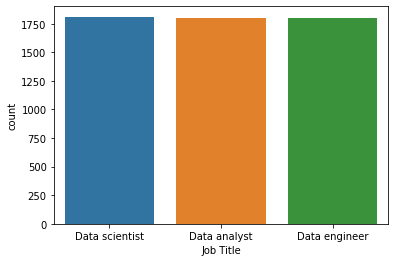

In [21]:
# Check the target distribution
sns.countplot(x="Job Title", data=X_train)

#### We can affirm that our data is balanced

## 5. Understanding variables

### 5.1. Dataset information

In [22]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5407 entries, 2169 to 860
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          5407 non-null   object 
 1   Rating             5407 non-null   float64
 2   Company Name       5406 non-null   object 
 3   Headquarters       5407 non-null   object 
 4   Founded            5407 non-null   int64  
 5   Type of ownership  5407 non-null   object 
 6   Industry           5407 non-null   object 
 7   Sector             5407 non-null   object 
 8   Competitors        5407 non-null   object 
 9   Easy Apply         5407 non-null   object 
 10  salary             5407 non-null   float64
 11  Python             5407 non-null   int64  
 12  SQL                5407 non-null   int64  
 13  ML                 5407 non-null   int64  
 14  company_size       5407 non-null   object 
 15  job_state          5407 non-null   object 
 16  company_revenue    540

In [23]:
X_train.head()

,Job Title,Rating,Company Name,Headquarters,Founded,Type of ownership,Industry,Sector,Competitors,Easy Apply,salary,Python,SQL,ML,company_size,job_state,company_revenue
2169,Data scientist,-1.0,Atlas General Insurance Svcs,-1,-1,-1,-1,-1,-1,-1,92000.0,1,1,1,-1,CA,-1
1949,Data scientist,3.8,Tata Consultancy Services\n3.8,"Mumbai, India",1968,Company - Public,Computer Hardware & Software,Information Technology,"Accenture, IBM, Infosys",-1,125000.0,1,1,1,10000,TX,10000
1920,Data analyst,4.4,Hinge Health\n4.4,"San Francisco, CA",2014,Company - Private,Health Care Services & Hospitals,Health Care,-1,-1,138500.0,1,1,0,350.0,CA,75.0
859,Data scientist,3.8,Mondo\n3.8,"New York, NY",2000,Company - Private,Staffing & Outsourcing,Business Services,"Robert Half, Insight Global",-1,136500.0,1,0,0,126.0,IL,300.0
681,Data analyst,4.7,PlayQ\n4.7,"Santa Monica, CA",2007,Company - Private,Video Games,Media,-1,-1,73000.0,1,1,0,126.0,CA,-1


In [24]:
X_train.tail()

,Job Title,Rating,Company Name,Headquarters,Founded,Type of ownership,Industry,Sector,Competitors,Easy Apply,salary,Python,SQL,ML,company_size,job_state,company_revenue
1519,Data analyst,4.5,Lodestone\n4.5,"Pleasanton, CA",2007,Company - Private,Internet,Information Technology,-1,-1,120000.0,0,0,0,350.0,CA,-1
685,Data scientist,3.8,UC Davis Medical Center\n3.8,"Sacramento, CA",-1,Nonprofit Organization,Health Care Services & Hospitals,Health Care,-1,-1,92000.0,0,0,0,10000,CA,4.0
720,Data scientist,4.7,Sutoer\n4.7,"Hinsdale, IL",-1,Company - Private,Advertising & Marketing,Business Services,-1,-1,63000.0,1,0,1,26.0,IL,3.0
884,Data scientist,4.0,Lorven Technologies Inc\n4.0,"Plainsboro, NJ",-1,Company - Private,Accounting,Accounting & Legal,-1,-1,111500.0,0,0,0,26.0,IL,1
860,Data engineer,3.2,Net2Source\n3.2,"Somerset, NJ",2007,Company - Private,Staffing & Outsourcing,Business Services,-1,-1,91500.0,1,0,0,3000.0,AZ,300.0


In [25]:
# Get column names
cols = pd.DataFrame(X_train.columns.values, columns=["Columns"])

# Get column types
types = pd.DataFrame(X_train.dtypes.values, columns=["Data type"])

# Get missings values
percent_missing = X_train.isin([-1,'-1','Unknown / Non-Applicable']).sum() * 100 / len(X_train)
percent_missing_df = pd.DataFrame(percent_missing.values, columns = ["MISSINGS (%)"])

# Get unique values
unicos = pd.DataFrame(X_train.nunique().values, columns = ["Unique values"])

# Mix in a dataframe
concatenado = pd.concat([cols, types, percent_missing_df, unicos], axis=1)
concatenado.set_index("Columns", drop=True, inplace=True)

concatenado

,Data type,MISSINGS (%),Unique values
Columns,,,
Job Title,object,0.000000,3
Rating,float64,11.004254,38
Company Name,object,0.000000,2774
Headquarters,object,6.658036,681
Founded,int64,25.688922,185
Type of ownership,object,6.436101,15
Industry,object,15.221010,102
Sector,object,15.165526,26
Competitors,object,71.906787,540


In [26]:
# Force dataframe types
X_train['company_size'] = X_train['company_size'].astype('int64')
X_train['company_revenue'] = X_train['company_revenue'].astype('int64')

X_test['company_size'] = X_test['company_size'].astype('int64')
X_test['company_revenue'] = X_test['company_revenue'].astype('int64')

### 5.2. Variable deletion

In [27]:
# Create function to drop columns
def drop_columns(columns):
    for c in columns:
        X_train.drop(c, axis=1, inplace=True)
        X_test.drop(c, axis=1, inplace=True)

In [28]:
# Delete columns with high percentage of missings and company name column as it is an identifier
drop_columns(['Easy Apply','Competitors','Company Name','company_revenue'])

## 6. Univariate analysis

### 6.1. Categoric variables

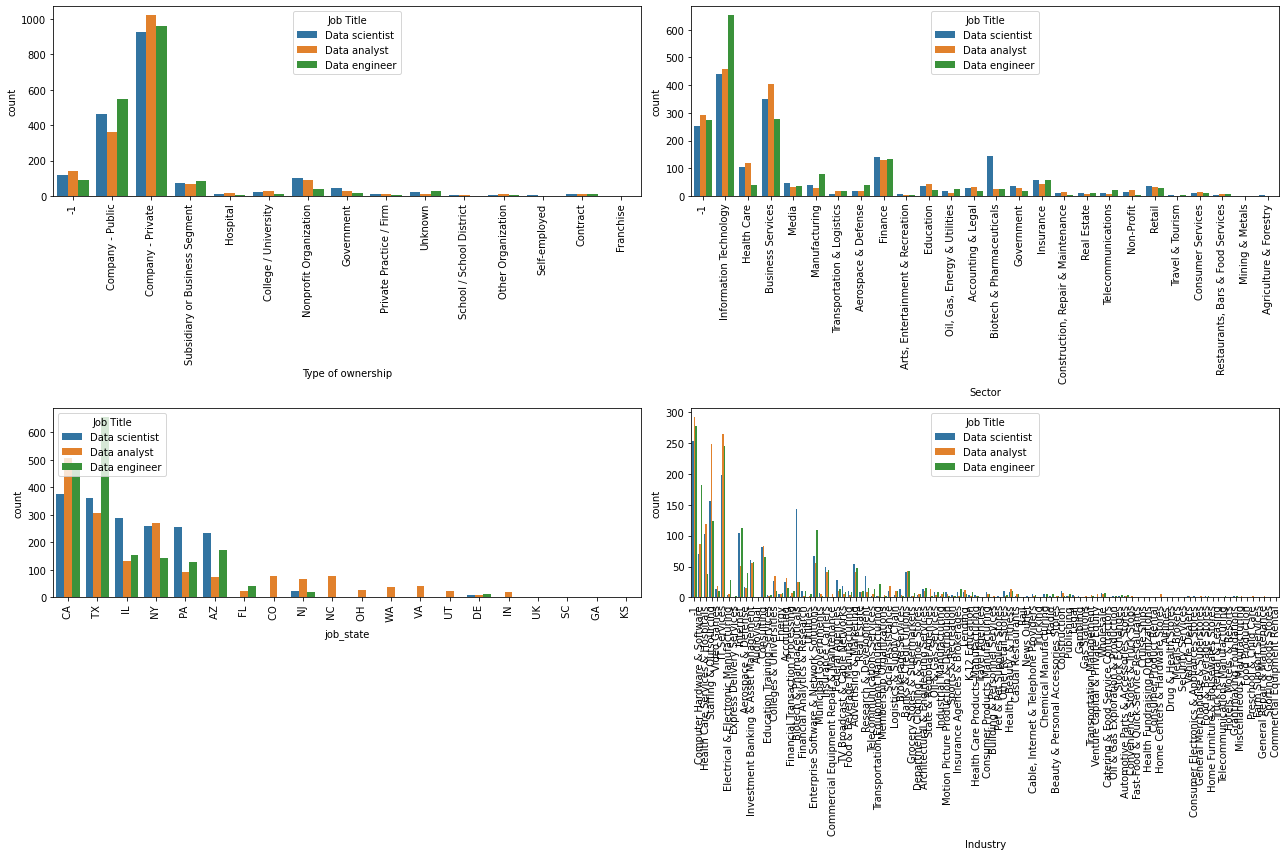

In [29]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

g = sns.countplot(X_train["Type of ownership"], hue=X_train["Job Title"], ax=axes[0][0])
g.set_xticklabels(axes[0][0].get_xticklabels(), rotation=90);

g = sns.countplot(X_train["Sector"], hue=X_train["Job Title"], ax=axes[0][1])
g.set_xticklabels(axes[0][1].get_xticklabels(), rotation=90);

g = sns.countplot(X_train["job_state"], hue=X_train["Job Title"], ax=axes[1][0])
g.set_xticklabels(axes[1][0].get_xticklabels(), rotation=90);

# LIMIT 30
g = sns.countplot(X_train["Industry"], hue=X_train["Job Title"], ax=axes[1][1])
g.set_xticklabels(axes[1][1].get_xticklabels(), rotation=90);

fig.tight_layout()

### 6.2. Numeric variables

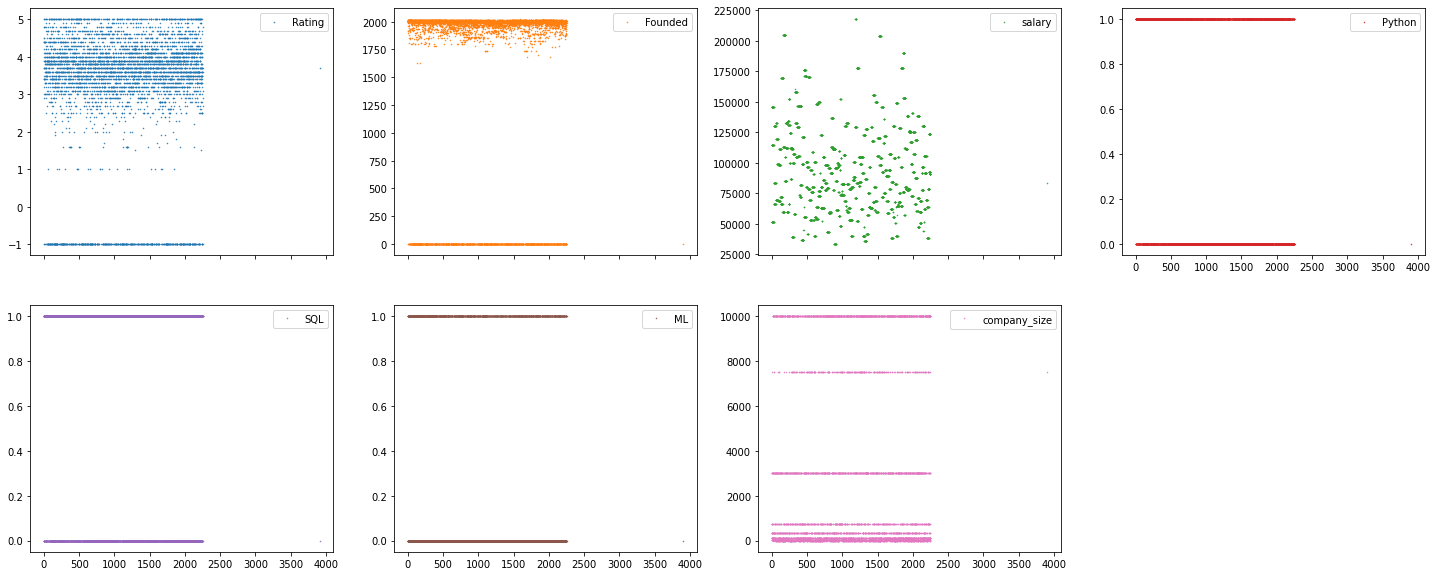

In [30]:
X_train.plot(lw=0,
        marker=".",
        subplots=True,
        layout=(-1, 4),
        figsize=(25, 10),
        markersize=1);

## 7. Bivariate analysis

In [31]:
sns.pairplot(X_train.reset_index(drop=True), kind='scatter', hue='Job Title');

## 8. Cleaning data

### 8.1. Missings

In [32]:
# Table to check the percentage of missings in each column
percent_missing_train = X_train.isin([-1,'-1','Unknown / Non-Applicable']).sum() * 100 / len(X_train)
percent_missing_test = X_test.isin([-1,'-1','Unknown / Non-Applicable']).sum() * 100 / len(X_test)

missing_value_df = pd.DataFrame([percent_missing_train,percent_missing_test]).rename(index={0:'Train',1:'Test'})
missing_value_df

,Job Title,Rating,Headquarters,Founded,Type of ownership,Industry,Sector,salary,Python,SQL,ML,company_size,job_state
Train,0.0,11.004254,6.658036,25.688922,6.436101,15.221010,15.165526,0.0,0.0,0.0,0.0,8.452007,0.0
Test,0.0,9.615385,4.881657,24.556213,4.437870,14.053254,14.053254,0.0,0.0,0.0,0.0,6.952663,0.0


In [33]:
# Declare some general lists
list_trains = [X_train,X_test]
list_jobs = ['Data engineer','Data analyst','Data scientist']

#### Rating

In [34]:
# Get the median for each Job Title value
engineer = X_train.loc[X_train['Job Title'] == 'Data engineer','Rating'].median()
analyst = X_train.loc[X_train['Job Title'] == 'Data analyst','Rating'].median()
scientist = X_train.loc[X_train['Job Title'] == 'Data scientist','Rating'].median()

values_to_replace = [engineer,analyst,scientist]

# Replace missing values
for t in list_trains:
    for m,j in zip(values_to_replace,list_jobs):
        rows = t.loc[t['Job Title'] == j,'Rating']
        res = rows.apply(lambda x : m if (x == -1) else x)
        t.loc[t['Job Title'] == j,'Rating'] = res

#### Type of ownership

In [35]:
# Get the mode for each Job Title value
engineer = X_train.loc[X_train['Job Title'] == 'Data engineer','Type of ownership'].mode()[0]
analyst = X_train.loc[X_train['Job Title'] == 'Data analyst','Type of ownership'].mode()[0]
scientist = X_train.loc[X_train['Job Title'] == 'Data scientist','Type of ownership'].mode()[0]

values_to_replace = [engineer,analyst,scientist]

# Replace missing values
for t in list_trains:
    for m,j in zip(values_to_replace,list_jobs):
        rows = t.loc[t['Job Title'] == j,'Type of ownership']
        res = rows.apply(lambda x : m if (x == '-1') else x)
        t.loc[t['Job Title'] == j,'Type of ownership'] = res

#### Sector

In [36]:
# Get the mode for each Job Title value
engineer = X_train.loc[X_train['Job Title'] == 'Data engineer','Sector'].mode()[0]
analyst = X_train.loc[X_train['Job Title'] == 'Data analyst','Sector'].mode()[0]
scientist = X_train.loc[X_train['Job Title'] == 'Data scientist','Sector'].mode()[0]

values_to_replace = [engineer,analyst,scientist]

# Replace missing values
for t in list_trains:
    for m,j in zip(values_to_replace,list_jobs):
        rows = t.loc[t['Job Title'] == j,'Sector']
        res = rows.apply(lambda x : m if (x == '-1') else x)
        t.loc[t['Job Title'] == j,'Sector'] = res

#### Company size

In [37]:
# Get the median for each Job Title value
engineer = X_train.loc[X_train['Job Title'] == 'Data engineer','company_size'].median()
analyst = X_train.loc[X_train['Job Title'] == 'Data analyst','company_size'].median()
scientist = X_train.loc[X_train['Job Title'] == 'Data scientist','company_size'].median()

values_to_replace = [engineer,analyst,scientist]

# Replace missing values
for t in list_trains:
    for m,j in zip(values_to_replace,list_jobs):
        rows = t.loc[t['Job Title'] == j,'company_size']
        res = rows.apply(lambda x : m if x == -1 else x)
        t.loc[t['Job Title'] == j,'company_size'] = res

In [38]:
# Drop some unwanted columns
drop_columns(['Headquarters','Industry','Founded'])

In [39]:
# Check again our missings table
percent_missing_train = X_train.isin([-1,'-1','Unknown / Non-Applicable']).sum() * 100 / len(X_train)
percent_missing_test = X_test.isin([-1,'-1','Unknown / Non-Applicable']).sum() * 100 / len(X_test)

missing_value_df = pd.DataFrame([percent_missing_train,percent_missing_test])
missing_value_df.T

,0,1
Job Title,0.0,0.0
Rating,0.0,0.0
Type of ownership,0.0,0.0
Sector,0.0,0.0
salary,0.0,0.0
Python,0.0,0.0
SQL,0.0,0.0
ML,0.0,0.0
company_size,0.0,0.0
job_state,0.0,0.0


### 8.2. Outliers

In [40]:
X_train.describe()

,Rating,salary,Python,SQL,ML,company_size
count,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000
mean,3.764047,93907.249861,0.466247,0.571851,0.278343,3077.634548
std,0.608947,34219.965743,0.498906,0.494856,0.448225,3930.961898
min,1.000000,33500.000000,0.000000,0.000000,0.000000,26.000000
25%,3.500000,68500.000000,0.000000,0.000000,0.000000,126.000000
50%,3.700000,88500.000000,0.000000,1.000000,0.000000,750.000000
75%,4.100000,113000.000000,1.000000,1.000000,1.000000,7500.000000
max,5.000000,217500.000000,1.000000,1.000000,1.000000,10000.000000


#### Como podemos observar en la tabla y por la naturaleza del dataset la unica columna que puede contener outliers es salary

In [41]:
# Check outliers in salary column
px.box(X_train['salary'])

#### Utilizamos el mismo criterio de eliminacion para train y test: los valores que esten por encima de 189.000

In [42]:
# Select the indexes that fit our match
list_outliers_train = X_train[X_train['salary'] > 189000].index
list_outliers_test = X_test[X_test['salary'] > 189000].index

# Delete the selected rows
X_train.drop(list_outliers_train, axis=0, inplace=True)
y_train.drop(list_outliers_train, axis=0, inplace=True)

X_test.drop(list_outliers_test, axis=0, inplace=True)
y_test.drop(list_outliers_test, axis=0, inplace=True)

#### Comprobamos que se ya no hay outliers en nuestro dataframe

In [43]:
# Check there are no outliers
px.box(X_train['salary'])

### 9. ENCODING

#### OneHotEncoder

In [44]:
# Declare our OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore')

# Fit columns to transform
oneHotValues = ohe.fit(X_train[['Sector','job_state','Type of ownership']])

# Transform the columns
oneHotTrain = oneHotValues.transform(X_train[['Sector','job_state','Type of ownership']]).toarray()
oneHotTest = oneHotValues.transform(X_test[['Sector','job_state','Type of ownership']]).toarray()

feature_labels = ohe.categories_

# Convert the labels array into 1D array
feature_labels = np.hstack(feature_labels)

# Create the dataframes
res_train = pd.DataFrame(oneHotTrain, columns=feature_labels)
res_test = pd.DataFrame(oneHotTest, columns=feature_labels)

# Join the dataframes
X_train = pd.concat([X_train.reset_index(drop=True), res_train], axis=1)
X_test = pd.concat([X_test.reset_index(drop=True), res_test], axis=1)

#### LabelEncoder

In [45]:
# Create our label encoders
le = preprocessing.LabelEncoder()
le_2 = preprocessing.LabelEncoder()

# Transform company size
le.fit(X_train['company_size'])
X_train['company_size'] = le.transform(X_train['company_size'])
X_test['company_size'] = le.transform(X_test['company_size'])

# Transform our target
le_2.fit(y_train)
y_train = le_2.transform(y_train)
y_test = le_2.transform(y_test)

In [46]:
# Drop old columns
drop_columns(['Job Title','Type of ownership','Sector','job_state'])

## 10. Feature reduction

### KBest

In [47]:
# We will use KBest to reduce our features
select = SelectKBest(chi2, k=15)
select.fit_transform(X_train, y_train)

# Apply the changes
filter = select.get_support()
X_train = X_train.loc[:,filter]
X_test = X_test.loc[:,filter]

In [48]:
# Check again the number of columns
len(X_train.columns)

15

In [49]:
X_train

,salary,Python,ML,company_size,Biotech & Pharmaceuticals,AZ,CO,IL,NC,OH,PA,TX,UT,VA,WA
0,92000.0,1,1,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,125000.0,1,1,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,138500.0,1,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,136500.0,1,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,73000.0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5205,120000.0,0,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5206,92000.0,0,0,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5207,63000.0,1,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5208,111500.0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 11. Model selection

### GridSearchCV

In [50]:
rf = RandomForestClassifier(random_state=42)
ab = AdaBoostClassifier(random_state=42)
dt = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier()
xgb = XGBClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)


random_forest = {
    'n_estimators': [200, 300, 400, 500],
    'max_depth': [11, 9, 13, 15, 17],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False],
    'criterion': ['gini','entropy']
}

decision_tree = {
    'criterion': ['gini','entropy','log_loss'],
    'splitter': ['best','random'],
    'max_depth': [11, 13, 15, 17],
    'min_samples_split': [2, 4, 10],
    'min_samples_leaf': [1, 2, 5],
}

ada_boost = {
    'n_estimators': [200 ,300, 400, 500],
    'algorithm': ['SAMME','SAMME.R'],
    'learning_rate': [0.05, 0.1]
}

knn_params = {
    'n_neighbors': [3, 5, 6, 8],
    'algorithm': ['auto','ball_tree','kd_tree','brute'],
    'leaf_size': [20, 30, 40, 50],
}

GBoost = {
    'learning_rate': [0.05, 0.1],
    'subsample': [1.0, 1.5],
    'criterion': ['friedman_mse','squared_error'],
    'min_samples_leaf': [1, 2, 5],
    'min_samples_split': [2, 4, 10],
    'n_estimators': [100,200,300]
}

XGBoost = {
    'subsample': [1.0, 1.5],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [8, 10, 12],
    'booster': ['gbtree','dart'],
    'n_estimators': [100,200,300]
}

list_estimators = [rf,dt,ab,knn,gb,xgb]
list_params = [random_forest,decision_tree,ada_boost,knn_params,GBoost,XGBoost]

In [52]:
warnings.filterwarnings('ignore')
for e,p in zip(list_estimators, list_params):
    res = GridSearchCV(estimator=e, param_grid=p, cv=5, n_jobs=-1)
    res.fit(X_train,y_train)
    print(res.best_estimator_)

RandomForestClassifier(max_depth=17, n_estimators=400, random_state=42)
DecisionTreeClassifier(max_depth=17, min_samples_split=10, random_state=42)
AdaBoostClassifier(learning_rate=0.1, n_estimators=500, random_state=42)
KNeighborsClassifier(leaf_size=20, n_neighbors=3)
GradientBoostingClassifier(min_samples_leaf=2, min_samples_split=10,
                           n_estimators=300, random_state=42)
XGBClassifier(base_score=0.5, booster='dart', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.6,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=0, 

## 12. Model testing

In [54]:
# AdaBoost
ab = AdaBoostClassifier(learning_rate=0.1, n_estimators=500, random_state=42)
ab.fit(X_train,y_train)

pred_ab_train = ab.predict(X_train)
pred_ab_test = ab.predict(X_test)

score_ab_train = accuracy_score(y_train, pred_ab_train)
score_ab_test = accuracy_score(y_test, pred_ab_test)

# KNN
knn = KNeighborsClassifier(leaf_size=20, n_neighbors=3)
knn.fit(X_train,y_train)

pred_knn_train = knn.predict(X_train)
pred_knn_test = knn.predict(X_test)

score_knn_train = accuracy_score(y_train, pred_knn_train)
score_knn_test = accuracy_score(y_test, pred_knn_test)

# RandomForest
rf = RandomForestClassifier(criterion='entropy', max_depth=17, n_estimators=400, random_state=42)
rf.fit(X_train,y_train)

pred_rf_train = rf.predict(X_train)
pred_rf_test = rf.predict(X_test)

score_rf_train = accuracy_score(y_train, pred_rf_train)
score_rf_test = accuracy_score(y_test, pred_rf_test)

# DecisionTree
dt = DecisionTreeClassifier(max_depth=17, min_samples_split=10, random_state=42)
dt.fit(X_train,y_train)

pred_dt_train = dt.predict(X_train)
pred_dt_test = dt.predict(X_test)

score_dt_train = accuracy_score(y_train, pred_dt_train)
score_dt_test = accuracy_score(y_test, pred_dt_test)

# GBoost
gb = GradientBoostingClassifier(min_samples_leaf=2, min_samples_split=10, n_estimators=300, random_state=42)
gb.fit(X_train, y_train)

pred_gb_train = gb.predict(X_train)
pred_gb_test = gb.predict(X_test)

score_gb_train = accuracy_score(y_train, pred_gb_train)
score_gb_test = accuracy_score(y_test, pred_gb_test)

# XGBoost
xgb = XGBClassifier(colsample_bytree=0.6, max_depth=8, booster='dart', random_state=42)
xgb.fit(X_train, y_train)

pred_xgb_train = xgb.predict(X_train)
pred_xgb_test = xgb.predict(X_test)

score_xgb_train = accuracy_score(y_train, pred_xgb_train)
score_xgb_test = accuracy_score(y_test, pred_xgb_test)

In [55]:
list_scores_train = [score_ab_train, score_knn_train, score_rf_train, score_dt_train, score_gb_train, score_xgb_train]
list_score_test = [score_ab_test, score_knn_test, score_rf_test, score_dt_test, score_gb_test, score_xgb_test]

pd.DataFrame([list_scores_train, list_score_test], columns=['AdaBoost','KNN','RandomForest','DecisionTree','GBoost','XGBoost']).rename(index={0:'Train',1:'Test'})

,AdaBoost,KNN,RandomForest,DecisionTree,GBoost,XGBoost
Train,0.620921,0.948177,0.954127,0.956814,0.936468,0.963916
Test,0.619697,0.911364,0.833333,0.936364,0.925758,0.941667


## 13. Results

#### Model with higher score

In [57]:
xgb = XGBClassifier(colsample_bytree=0.6, max_depth=8, booster='dart', random_state=42)
xgb.fit(X_train, y_train)

pred_xgb_train = xgb.predict(X_train)
pred_xgb_test = xgb.predict(X_test)

print('Accuracy: %.3f' % accuracy_score(y_train, pred_xgb_train))
print('Accuracy: %.3f' % accuracy_score(y_test, pred_xgb_test))

Accuracy: 0.964
Accuracy: 0.942


#### Features model importance

<AxesSubplot:>

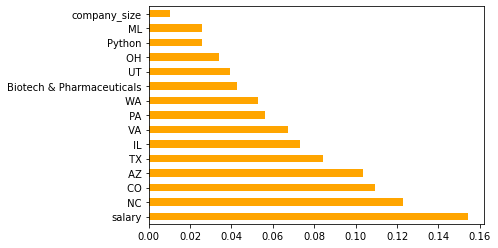

In [64]:
feat_importances = pd.Series(xgb.feature_importances_, index=X_train.columns)
feat_importances.nlargest(15).plot(kind='barh', color='orange')

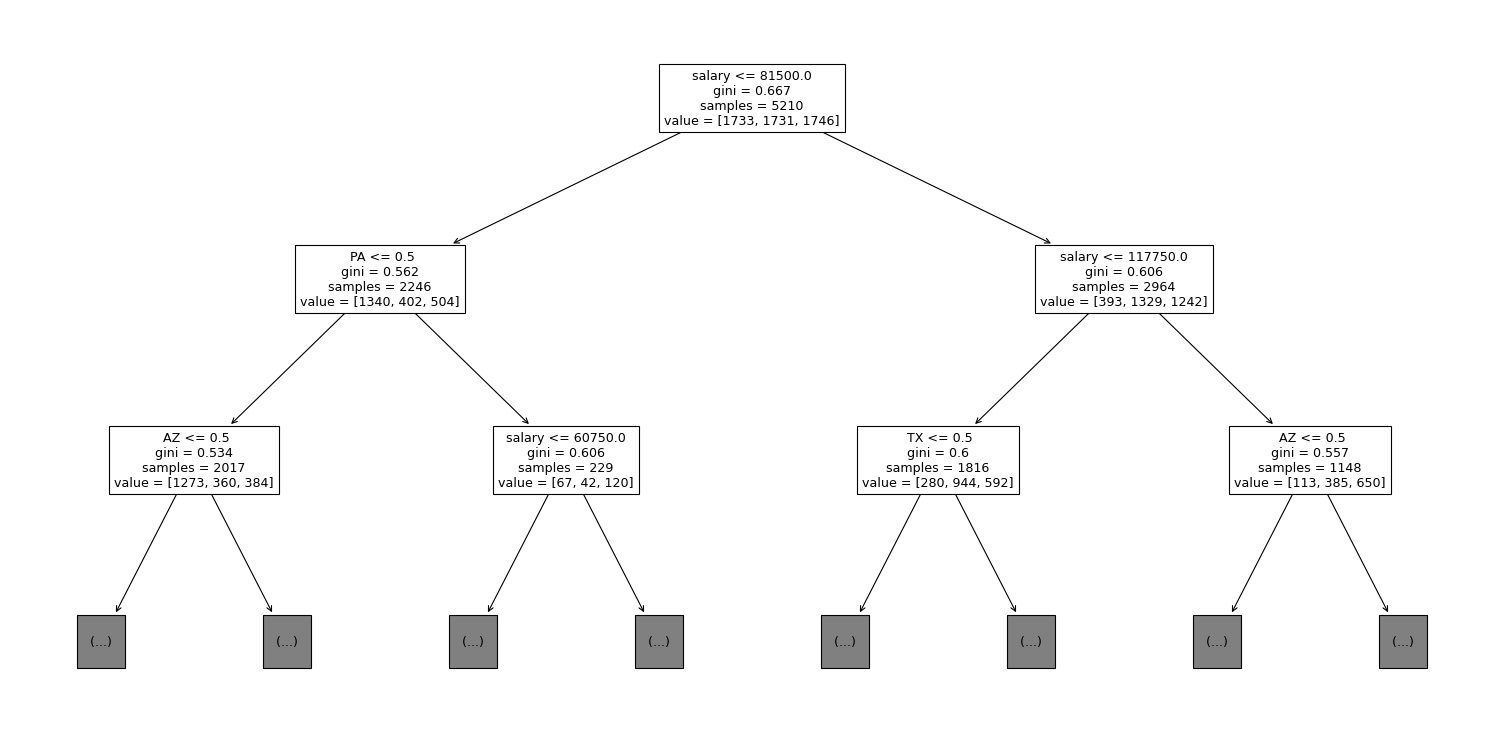

In [ ]:
#plt.figure(figsize=(24, 12), dpi=80)
#tree.plot_tree(dt, max_depth=2, feature_names=X_train.columns)
#plt.show()